In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
# Load Data
data = pd.read_csv("../data/solar_data.csv")
print("Data Loaded Successfully!")


Data Loaded Successfully!


In [3]:
# Summary Statistics
print("Summary Statistics:")
summary = data.describe()
print(summary)


Summary Statistics:
              GHI        DHI         WS          WD       Tamb         RH
count    9.000000  10.000000  10.000000   10.000000  10.000000  10.000000
mean   198.888889  56.500000   5.520000  178.000000  25.900000  65.200000
std     78.651835  11.067972   0.606996   14.944341   1.791957   5.977736
min      0.000000  40.000000   4.600000  150.000000  23.000000  55.000000
25%    200.000000  50.000000   5.050000  171.250000  25.000000  61.250000
50%    220.000000  55.000000   5.600000  180.000000  26.000000  65.500000
75%    240.000000  63.750000   5.950000  188.750000  26.750000  69.500000
max    260.000000  75.000000   6.400000  200.000000  29.000000  73.000000


In [4]:
# Data Quality Check
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values)



Missing Values:
Date    0
GHI     1
DHI     0
WS      0
WD      0
Tamb    0
RH      0
dtype: int64


In [5]:
# Handle Missing Values
data['GHI'] = data['GHI'].fillna(data['GHI'].mean())
print("Missing Values in 'GHI' Column Handled with Mean")


Missing Values in 'GHI' Column Handled with Mean



Time Series Visualization:


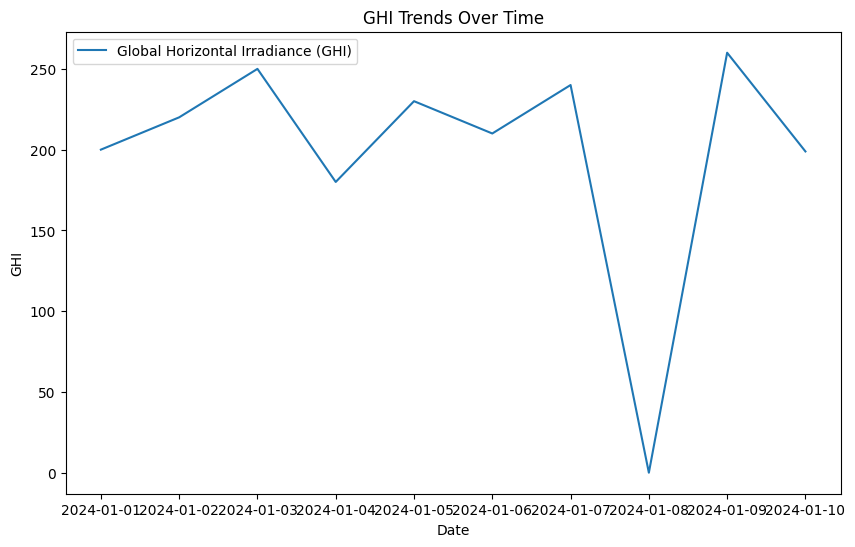

In [6]:
# Time Series Analysis
print("\nTime Series Visualization:")
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['GHI'], label="Global Horizontal Irradiance (GHI)")
plt.xlabel('Date')
plt.ylabel('GHI')
plt.title('GHI Trends Over Time')
plt.legend()
plt.show()



Correlation Heatmap:


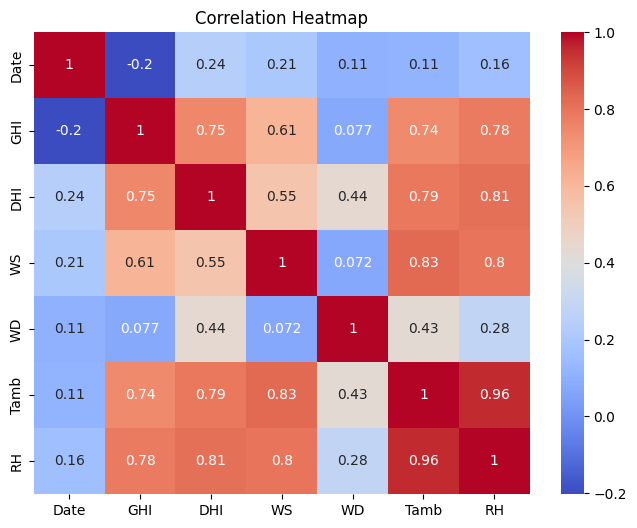

In [7]:
# Correlation Analysis
print("\nCorrelation Heatmap:")
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Wind and Temperature Analysis
import plotly.io as pio
pio.renderers.default = 'browser'

fig = px.scatter_polar(data, r='WS', theta='WD', title="Wind Speed vs. Wind Direction")
fig.show()




In [11]:
# Data Cleaning
print("\nCleaning Data: Removing invalid GHI values")
data = data[data['GHI'] > 0]
print("Data Cleaning Completed")



Cleaning Data: Removing invalid GHI values
Data Cleaning Completed



Bubble Chart Visualization:


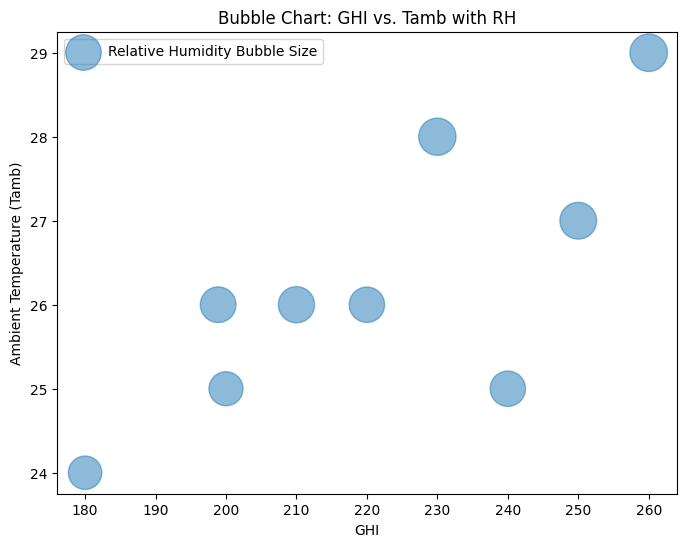

In [12]:
# Advanced Visualization: Bubble Chart
print("\nBubble Chart Visualization:")
plt.figure(figsize=(8, 6))
plt.scatter(data['GHI'], data['Tamb'], s=data['RH'] * 10, alpha=0.5, label="Relative Humidity Bubble Size")
plt.xlabel('GHI')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs. Tamb with RH')
plt.legend()
plt.show()
